# zad1

In [119]:
class QueueBaB(object): #first in, first out
    #check if dodawanie i usuwanie z listy jest poprawne
    
    def __init__(self):
        self.list_of_items = []
    
    def enqueue(self, item):
        self.list_of_items.append(item)
    
    def dequeue(self):
        return self.list_of_items.pop(0)
  
    def is_empty(self):
        return self.list_of_items==[]
    
    def size(self):
        return len(self.list_of_items)
    
    def perform(self):
        print(self.list_of_items)
        

In [120]:
first=QueueBaB()

In [121]:
first.is_empty()

True

In [122]:
first.enqueue('4')
first.enqueue(5)
first.enqueue("'a','a'")
first.size()

3

In [123]:
first.dequeue()

'4'

In [124]:
first.perform()

[5, "'a','a'"]


In [125]:
class QueueBaE(object):

    def __init__(self):
        self.list_of_items = []
    
    def enqueue(self, item):
        self.list_of_items.insert(0,item)
    
    def dequeue(self):
        return self.list_of_items.pop()
  
    def is_empty(self):
        return self.list_of_items==[]
    
    def size(self):
        return len(self.list_of_items) 
    
    def perform(self):
        print(self.list_of_items)

In [126]:
second=QueueBaE()

In [127]:
second.enqueue(4)
second.enqueue(6)
second.enqueue(8)

In [128]:
second.dequeue()

4

In [129]:
second.perform()

[8, 6]


In [130]:
second.is_empty()

False

## ZAD2

In [131]:
import time
import matplotlib.pyplot as mlt
import numpy as np

`czy rodzaj dodawanych elementów ma znaczenie?`
- wykresy --> not sure czy to tak powinno działać, czy wartości czasu są dobrze zdefiniowane
- wychodzą ujemne czasy
- poprawić ich wygląd

In [132]:
def time_measure(n):
    BaB=QueueBaB()
    BaE=QueueBaE()
    
    startB1=time.time()
    for i in range(n):
        BaB.enqueue(i)
    endB1= time.time()
        
    startE1=time.time()
    for i in range(n):
        BaE.enqueue(i)
    endE1=time.time()
    
    startB2=time.time()
    for _ in range(n):
        BaB.dequeue()
    endB2= time.time()
    
    startE2=time.time()
    for _ in range(n):
        BaE.dequeue()
    endE2=time.time()
    
    return [endB1-startB1, endB2-startB2,endE1-startE1,endE2-startE2]

In [133]:
time_measure(10000)

[0.004010438919067383,
 0.01900005340576172,
 0.03699064254760742,
 0.0039997100830078125]

In [134]:
def compare_enqueue(n): #number of elements
    
    xb=np.linspace(0,n)
    timeb=np.linspace(0,time_measure(n)[0])
    xe=np.linspace(0,n)
    timee=np.linspace(0,time_measure(n)[1])
    

    plt.plot(xb,timeb, 'C1.',label='QueueBaB')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Enqueue")
    
    plt.plot(xe,timee, 'C2.', label='QueueBaE')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Enqueue")
    
    
    plt.legend()
    plt.grid()
    plt.show()

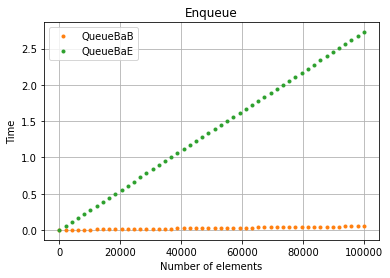

In [154]:
compare_enqueue(100000)

In [136]:
def compare_dequeue(n): #number of elements
    
    xb=np.linspace(0,n)
    timeb=np.linspace(0,np.abs(time_measure(n)[2]))
    xe=np.linspace(0,n)
    timee=np.linspace(0,np.abs(time_measure(n)[3]))
    

    plt.plot(xb,timeb, 'C1.',label='QueueBaB')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Dequeue")
    
    plt.plot(xe,timee, 'C2.', label='QueueBaE')
    plt.xlabel('Number of elements')
    plt.ylabel('Time')
    plt.title("Dequeue")
    
    plt.legend()
    plt.grid()
    plt.show()

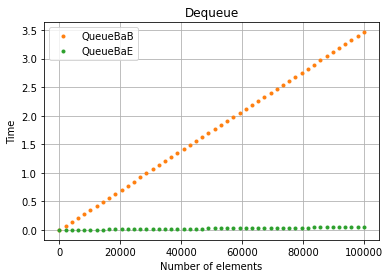

In [137]:
compare_dequeue(100000)

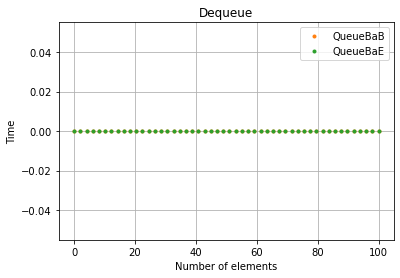

In [138]:
#compare_dequeue(100000)
compare_dequeue(100)

In [159]:
def open_txt(filename):
    f=open(filename,"r", encoding="utf-8")
    file=f.read()
    file=file.split()
    return file

In [160]:
type(open_txt('historyjka.txt'))

list

In [161]:
def measure_time_str(filename):
    list_of_str=open_txt(filename)
    BaB=QueueBaB()
    BaE=QueueBaE()
    
    startB1=time.time()
    for i in range(0,len(list_of_str)):
        BaB.enqueue(list_of_str[i])
    endB1=time.time()
    
    startE1=time.time()
    for i in range(0,len(list_of_str)):
        BaE.enqueue(list_of_str[i])
    endE1=time.time()
    
    startB2=time.time()
    for _ in range(0,len(list_of_str)):
        BaB.dequeue()
    endB2= time.time()
    
    startE2=time.time()
    for _ in range(0,len(list_of_str)):
        BaE.dequeue()
    endE2=time.time()
    
    return [endB1-startB1, endB2-startB2,endE1-startE1,endE2-startE2]

In [162]:
measure_time_str('historyjka.txt')

[0.0006866455078125, 0.0, 0.0003008842468261719, 0.0]

In [169]:
def compare_enqueue_str(filename):
    file_txt=open_txt(filename)
    
    xb=np.linspace(0,len(file_txt))
    timeb=np.linspace(0,measure_time_str(filename)[0])
    
    xe=np.linspace(0,len(file_txt))
    timee=np.linspace(0,measure_time_str(filename)[1])
    
    plt.plot(xb,timeb, 'C1.',label='QueueBaB')
    plt.xlabel('Number of words')
    plt.ylabel('Time')
    plt.title("Enqueue")
    
    #plt.plot(xe,timee, 'C2.', label='QueueBaE')
    plt.xlabel('Number of words')
    plt.ylabel('Time')
    plt.title("Enqueue")
    
    plt.legend()
    plt.grid()
    plt.show()
    

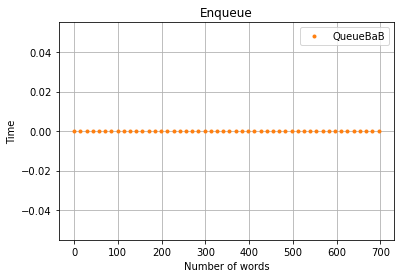

In [170]:
compare_enqueue_str('historyjka.txt')

### Wnioski:
- typ dodawanych agrumentów do kolejek nie ma znaczenia, wyniki są takie same na tych samych rzędach 

# zad4